<a href="https://colab.research.google.com/github/tyceaddley/Heart_Failure_Analysis/blob/master/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
#!pip install bubbly

In [13]:
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.offline as py

from plotly.offline import iplot
import plotly.graph_objs as go

from bubbly.bubbly import bubbleplot


In [14]:
df = pd.read_csv('../content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')

In [15]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df.shape
df = df.sort_values('age')
df = df.astype(int)

In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,0.979933,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.098931,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.000000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.000000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.000000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.000000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
import warnings
warnings.filterwarnings('ignore')

#generate a fun graph with four of the variables plotted to understand their relationships a little better.
#may or may not provide insight
figure = bubbleplot(dataset= df, x_column = 'creatinine_phosphokinase', y_column = 'platelets',
                    bubble_column = 'sex', time_column = 'age', size_column = 'serum_sodium',
                    color_column = 'sex', x_title = "Creatinine Phosphokinase", y_title = "Platelets",
                    title = "Creatinine Phosphokinase vs Platelet Count vs Age vs Sex",
                    x_logscale = False, scale_bubble = 1, height = 650)

#set iplot so that it shows in colab. settings in 2nd cell
py.iplot(figure, config={'scrollZoom': True})

Text(0.5, 1.0, 'Heatmap for the dataset')

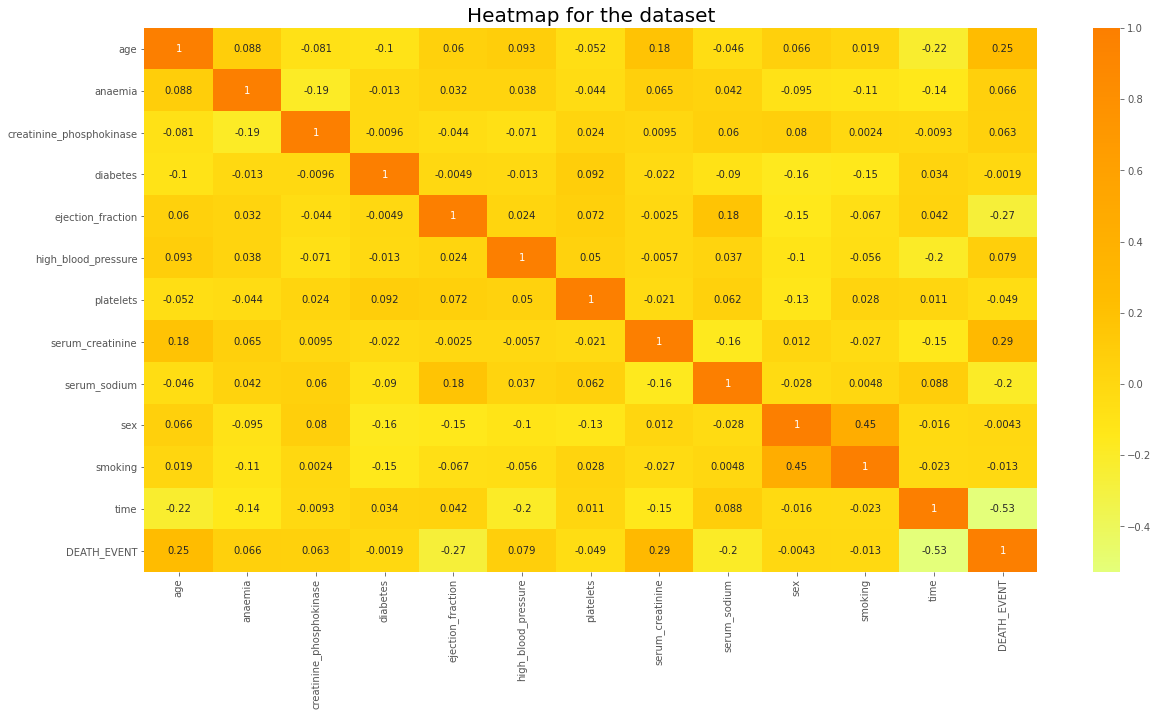

In [19]:
#use ggplot styling and set size of figure
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

#show the heatmap and set the style of the figure
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the dataset', fontsize = 20)



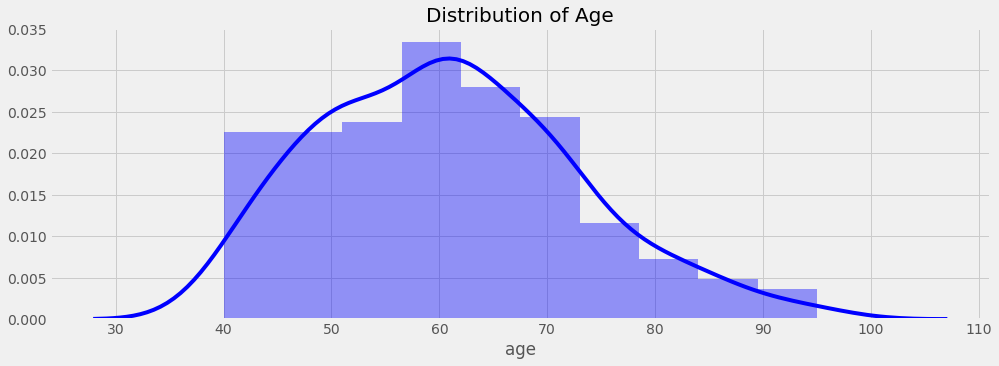

In [20]:
#show graph of age distribution and the upper/lower tails
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['age'], color = 'blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

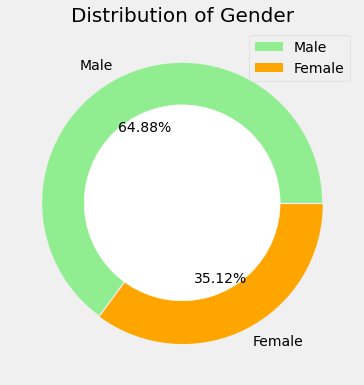

In [21]:
#set easy params for chart
gen_size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

#visualize the distribution of Male vs Female patients
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(gen_size, colors = colors, labels = labels, shadow = False, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

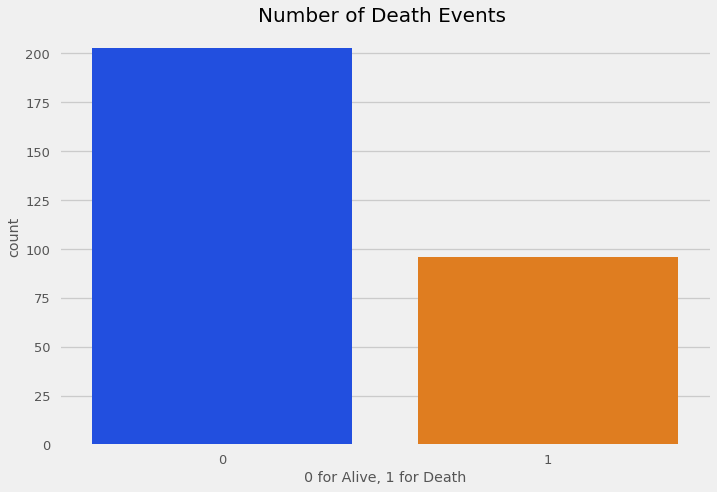

In [22]:
#how many people died or lived 
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('seaborn-talk')
sns.countplot(df['DEATH_EVENT'], palette = 'bright')
plt.xlabel('0 for Alive, 1 for Death')
plt.title('Number of Death Events ', fontsize = 20)
plt.show()

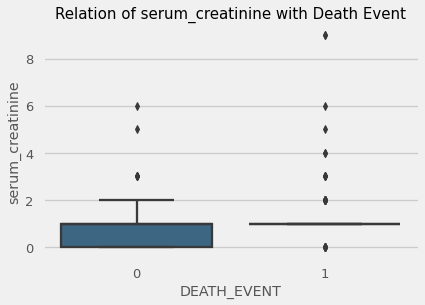

In [23]:
#serum_creatinine and the correspondence with death event
plt.rcParams['figure.figsize'] = (6,4)
sns.boxplot(df['DEATH_EVENT'], df['serum_creatinine'], palette = 'viridis')
plt.title('Relation of serum_creatinine with Death Event', fontsize = 15)
plt.show()

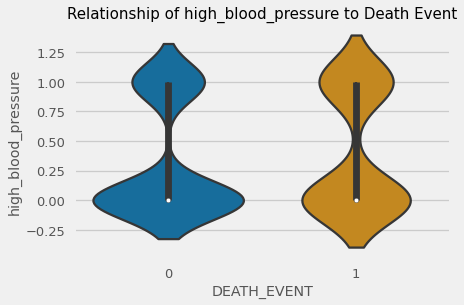

In [24]:
plt.rcParams['figure.figsize'] = (6,4)
sns.violinplot(df['DEATH_EVENT'], df['high_blood_pressure'], palette = 'colorblind')
plt.title('Relationship of high_blood_pressure to Death Event', fontsize = 15, fontweight = 25)
plt.show()

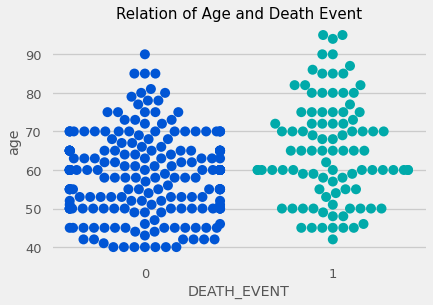

In [25]:
plt.rcParams['figure.figsize'] = (6,4)
sns.swarmplot(df['DEATH_EVENT'], df['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and Death Event', fontsize = 15, fontweight = 15)
plt.show()

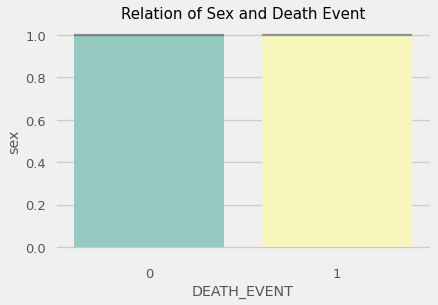

In [26]:
sns.boxenplot(df['DEATH_EVENT'], df['sex'], palette = 'Set3')
plt.title('Relation of Sex and Death Event', fontsize = 15,  fontweight = 20)
plt.show()

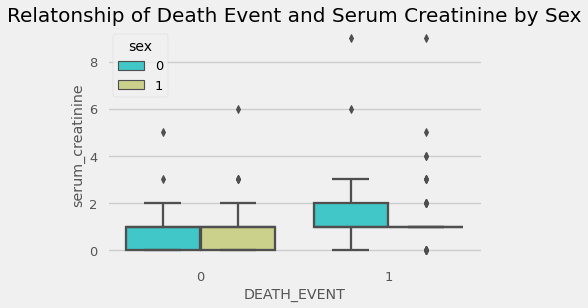

In [27]:
sns.boxplot(x=df['DEATH_EVENT'], y=df['serum_creatinine'], hue=df['sex'], palette='rainbow')
plt.title('Relatonship of Death Event and Serum Creatinine by Sex', fontsize=20, fontweight = 30)
plt.show()

In [30]:
#Create 3d scatter plot showing relationship between serum_sodium, creatinine_phosphokinase, and age
trace = go.Scatter3d(
    x=(df['serum_sodium']),
    y=df['creatinine_phosphokinase'],
    z=df['age'],
    name='Marvel',
    mode='markers',
    marker=dict(
        size=10,
        color=df['age']
    )
)

data = [trace]
#set layout for the 3d graph and titles
layout=go.Layout(
    title = 'Serum Sodium vs Creatinine Phosphokinase vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene =dict(
        xaxis =dict(title ='Serum Creatinine'),
        yaxis=dict(title='Creatinine Phosphokinase'),
        zaxis=dict(title='Age')
    )
)
fig =go.Figure(data=data, layout=layout)
py.iplot(fig)

In [31]:
#taking labels from data and creating target class
y = df['DEATH_EVENT']

df = df.drop('DEATH_EVENT', axis=1)

print("Shape of y:", y.shape)

Shape of y: (299,)


In [36]:
#one hot encoding of the data 
#drop_first=True, meaning droping the first categories from each attribute. 
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
269,40,0,582,1,35,0,222000,1,132,1,0,244
232,40,1,129,0,35,0,255000,0,137,1,0,209
180,40,0,478,1,30,0,303000,0,136,1,0,148
242,40,0,90,0,35,0,255000,1,136,1,1,212
248,40,0,624,0,35,0,301000,1,142,1,1,214


In [37]:
x = df

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (299, 12)
Shape of y: (299,)


In [38]:
#describe the number of deaths in the data set, death=1
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
#create the training and testing sets for machine learning models
x_train, x_test, y_train,  y_test = train_test_split(x,y,test_size =0.3, random_state=1111)

#shape of data
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (209, 12)
Shape of x_test : (90, 12)
Shape of y_train : (209,)
Shape of y_test : (90,)


Training accuracy : 0.9330143540669856
Testing accuracy : 0.8222222222222222
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        65
           1       0.68      0.68      0.68        25

    accuracy                           0.82        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.82      0.82      0.82        90



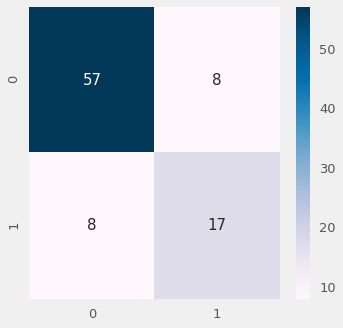

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict= model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

#evaluate how well the model predicts target class:
print('Training accuracy :', model.score(x_train, y_train))
print('Testing accuracy :', model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')

cr =classification_report(y_test, y_pred)
print(cr)

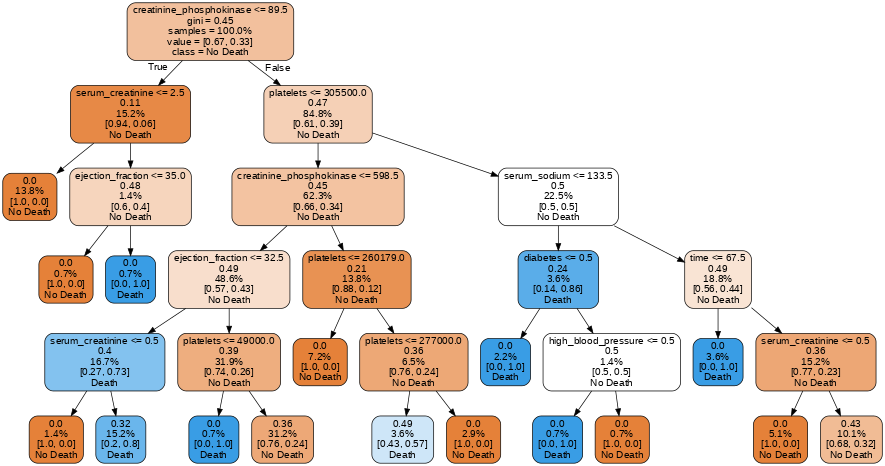

In [54]:
#show the decision tree arrangement from the randomforestclassifier 
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'No Death'
y_train_str[y_train_str == '1'] = 'Death'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

In [55]:

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8769230769230769
Specificity :  0.68


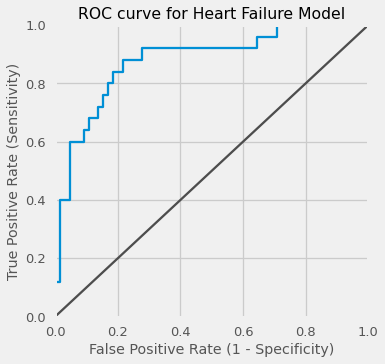

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (3, 5)
plt.title('ROC curve for Heart Failure Model', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [57]:
# let's check the auc score

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.8787692307692307
